## Notebook Intentions

The purpose of this notebook is to explore how the utilization and expenditure values of office based events have changed over the decade (2008-2018).

## Structure

## Findings

In [1]:
import os
from os.path import expanduser

import sys
sys.path.append(os.path.join(expanduser("~"), "meps", "meps_dev"))

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "meps_db.settings")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import django
django.setup();

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

from meps_db.components.reference import DATA_FILES_YEARS
from meps_db.analysis.utilization import OfficeBasedUtilization

In [2]:
obu = OfficeBasedUtilization(years=DATA_FILES_YEARS[:11])
annual_data = obu.calculate_office_based_metrics()

In [3]:
office_based_timeseries_df = pd.DataFrame(annual_data)
office_based_timeseries_df.rename(columns={"age_group": "Age Group", "usc_cat": "USC Status"}, inplace=True)

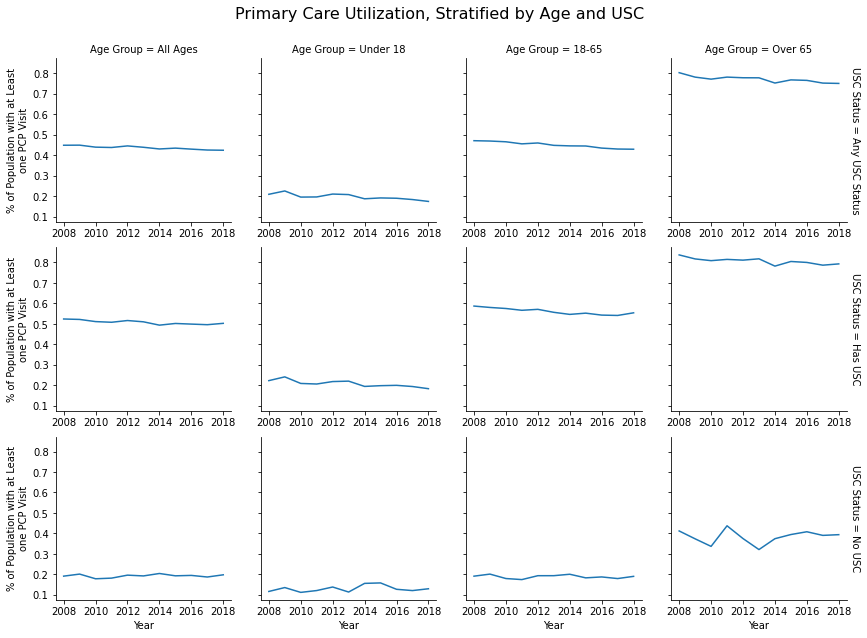

In [4]:
ax = sns.FacetGrid(office_based_timeseries_df, col="Age Group", row="USC Status", sharex=False,  margin_titles=True)
ax.map(
    sns.lineplot,
    "year", 
    "at_least_one_pcp_visits", 
)
ax.set_axis_labels("Year", "\n".join(wrap(f"% of Population with at Least one PCP Visit", 30)))
ax.set(xticks=[year for num, year in enumerate(DATA_FILES_YEARS[:11]) if num%2==0 ])
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Primary Care Utilization, Stratified by Age and USC",
    fontsize=16,
)
plt.savefig(f"facetplots/pcp_util.png", bbox_inches='tight')
plt.show()

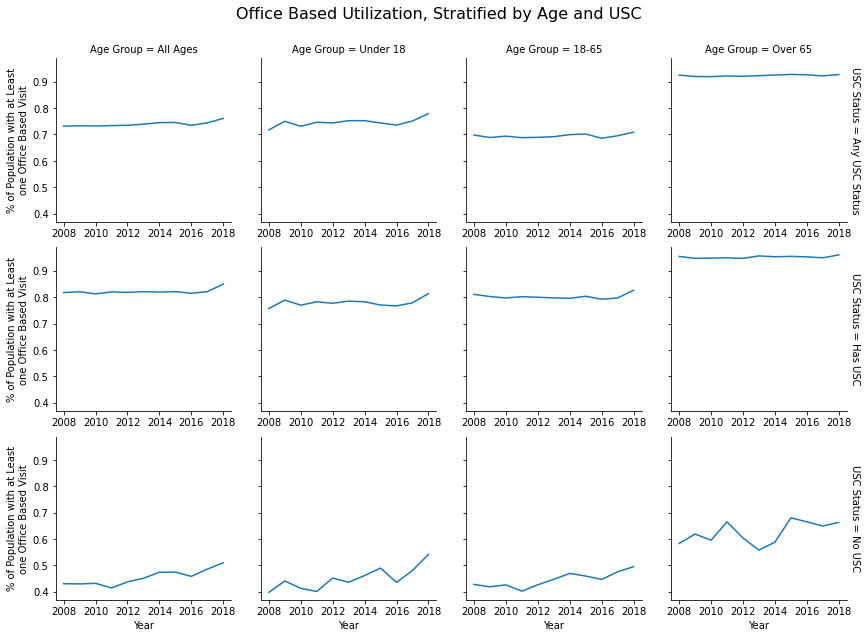

In [5]:
ax = sns.FacetGrid(office_based_timeseries_df, col="Age Group", row="USC Status", sharex=False,  margin_titles=True)
ax.map(
    sns.lineplot,
    "year", 
    "at_least_one_ob_visits", 
)
ax.set_axis_labels("Year", "\n".join(wrap(f"% of Population with at Least one Office Based Visit", 30)))
ax.set(xticks=[year for num, year in enumerate(DATA_FILES_YEARS[:11]) if num%2==0 ])
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Office Based Utilization, Stratified by Age and USC",
    fontsize=16, 
) 
plt.savefig(f"facetplots/ob_util.png", bbox_inches='tight')
plt.show()

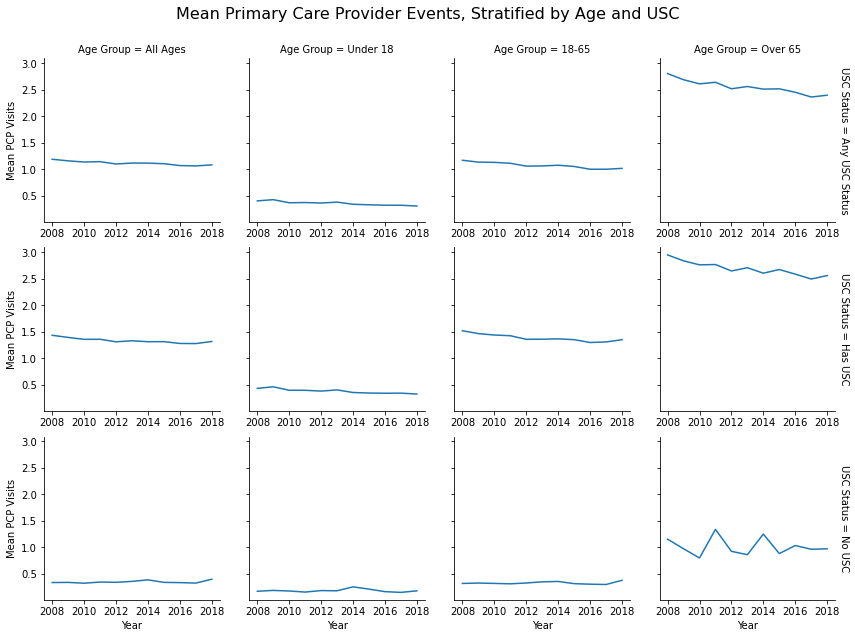

In [6]:
ax = sns.FacetGrid(office_based_timeseries_df, col="Age Group", row="USC Status", sharex=False,  margin_titles=True)
ax.map(
    sns.lineplot,
    "year", 
    "mean_pcp_visits", 
)
ax.set_axis_labels("Year", "\n".join(wrap(f"Mean PCP Visits", 30)))
ax.set(xticks=[year for num, year in enumerate(DATA_FILES_YEARS[:11]) if num%2==0 ])
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Mean Primary Care Provider Events, Stratified by Age and USC",
    fontsize=16,
)
plt.savefig(f"facetplots/pcp_mean.png", bbox_inches='tight')
plt.show()

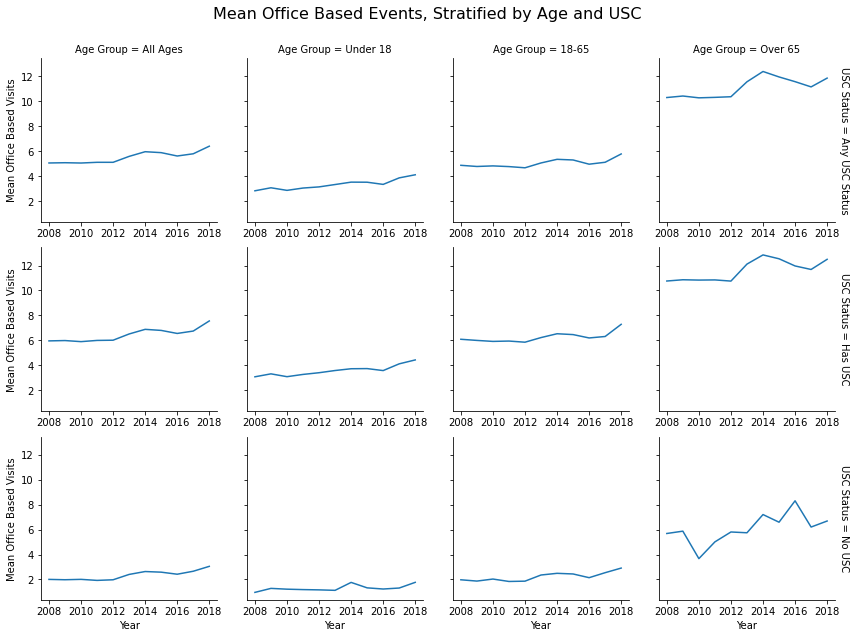

In [7]:
ax = sns.FacetGrid(office_based_timeseries_df, col="Age Group", row="USC Status", sharex=False,  margin_titles=True)
ax.map(
    sns.lineplot,
    "year", 
    "mean_ob_visits", 
)
ax.set_axis_labels("Year", "\n".join(wrap(f"Mean Office Based Visits", 30)))
ax.set(xticks=[year for num, year in enumerate(DATA_FILES_YEARS[:11]) if num%2==0 ])
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Mean Office Based Events, Stratified by Age and USC",
    fontsize=16,
)
plt.savefig(f"facetplots/ob_mean.png", bbox_inches='tight')
plt.show()

In [11]:
test = office_based_timeseries_df.loc[
    (office_based_timeseries_df["Age Group"] == "All Ages")
    & (office_based_timeseries_df["USC Status"].isin({"Has USC", "No USC"}))
]
test["pct_of_pop"] = test["sample_population_size"] / test["total_valid_population_weight"] 

<ipython-input-11-c363e3272b32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["pct_of_pop"] = test["sample_population_size"] / test["total_valid_population_weight"]


In [12]:
test.head()

,year,Age Group,USC Status,at_least_one_ob_visits,at_least_one_pcp_visits,mean_ob_visits,median_ob_visits,mean_pcp_visits,median_pcp_visits,sample_size,sample_population_size,total_valid_population_weight,pct_of_pop
1,2018,All Ages,Has USC,0.849471,0.502558,7.561264,3,1.314128,1,22440,2.418773e+08,3.143487e+08,0.769455
2,2018,All Ages,No USC,0.509945,0.197687,3.053021,1,0.396444,0,6580,7.229042e+07,3.143487e+08,0.229969
13,2017,All Ages,Has USC,0.821148,0.495921,6.751907,3,1.274894,0,24044,2.501200e+08,3.134242e+08,0.798024
14,2017,All Ages,No USC,0.486083,0.186943,2.661171,0,0.323719,0,6415,6.312465e+07,3.134242e+08,0.201403
25,2016,All Ages,Has USC,0.815075,0.498850,6.560628,3,1.276968,0,25697,2.497680e+08,3.132961e+08,0.797227


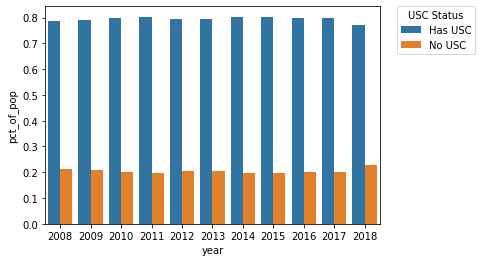

In [14]:
ax = sns.barplot(data=test, x="year", y="pct_of_pop", hue="USC Status")
plt.legend(title="USC Status", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)